1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, fftpack
from math import sqrt


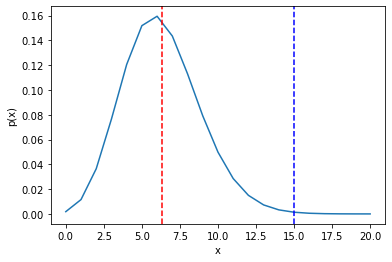

<Figure size 432x288 with 0 Axes>

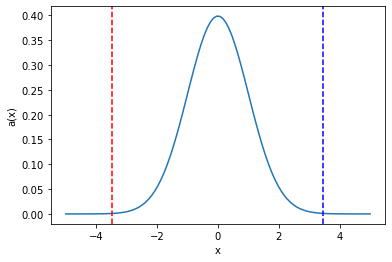

The probability of having hurricanes >= 15 in annualy is  0.2217122790073356 %


In [9]:
# Assuming num of hurricanes is random
x0 = 15
mean = 6.3
w = x0 - mean
sigma = sqrt(mean)

x = np.linspace(0, 20, 21)
y = stats.poisson.pmf(x, mean)

# Plotting the poisson distribution
def P(lamb,k):
        return ((lamb**k)*np.exp(-lamb))/(np.math.factorial(k))

plt.figure()
plt.plot(x, y)
plt.axvline(x0, linestyle='--', color='b')
plt.axvline(mean, linestyle='--', color='r')
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

Z = w/sigma
plt.figure()
x1 = np.linspace(-5, 5, 100)
y1 = stats.norm.pdf(x1)

# Plotting the Z score
plt.figure()
plt.plot(x1, y1)
plt.axvline(Z, linestyle='--', color='b')
plt.axvline(-Z, linestyle='--', color='r')
plt.xlabel("x")
plt.ylabel("a(x)")
plt.show()

# Computing probability
partial = [P(mean,i) for i in range(0,15)]
p = (1 - sum(partial))*100
print("The probability of having hurricanes >= 15 in annualy is ", p, "%")

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [10]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

pre_mean = np.mean(pre)
post_mean = np.mean(post)
pre_sigma = np.sqrt(np.var(pre, ddof=1))
post_sigma = np.sqrt(np.var(post, ddof=1)) 
sigma = np.sqrt((pre_sigma**2 + post_sigma**2)/2) 

n = len(pre) 
T = (pre_mean - post_mean) / (sigma * np.sqrt(2/n)) 
print("T=: ",T)
pvalue = t.cdf(T, n - 1) + (1. - t.cdf(-T, n - 1)) 
print("p-value =", pvalue)

T=:  -3.786997938137629
p-value = 0.004302464132864604


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

Hares peak frequency: 0.09523809523809523
Lynx peak frequency: 0.09523809523809523
Carrot peak frequency: 0.09523809523809523


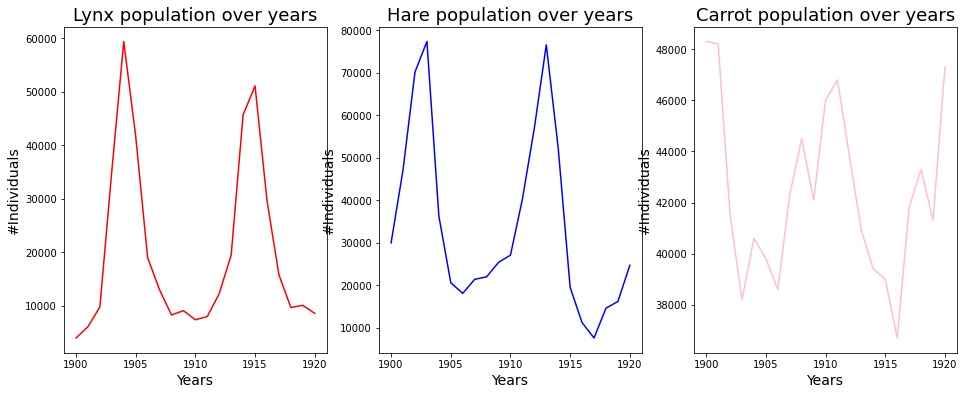

In [16]:
input_file = './lynxhare.txt'
data = pd.read_csv('./data/populations.txt', delimiter = '\t')

#let's plot hare vs year and lynx vs year
years = np.array(data['# year'])

lynxPopulation = np.array(data['lynx'])
harePopulation = np.array(data['hare'])
carrotPopulation = np.array(data['carrot'])

fig, ax = plt.subplots(nrows=1, ncols=3, sharex='row', figsize=(16,6))
ax[0].plot(years,lynxPopulation, label = 'Lynx population', color ='r')
ax[1].plot(years,harePopulation, label = 'Hare population', color = 'b')
ax[2].plot(years,carrotPopulation, label = 'Hare population', color = 'pink')

ax[0].set_title('Lynx population over years', fontsize = 18)
ax[0].set_xlabel('Years', fontsize = 14)
ax[0].set_ylabel('#Individuals', fontsize = 14)

ax[1].set_title('Hare population over years', fontsize = 18)
ax[1].set_xlabel('Years', fontsize = 14)
ax[1].set_ylabel('#Individuals', fontsize = 14)

ax[2].set_title('Carrot population over years', fontsize = 18)
ax[2].set_xlabel('Years', fontsize = 14)
ax[2].set_ylabel('#Individuals', fontsize = 14)
timeStep = 1

#fourier transformations
FFTHare = fftpack.fft(harePopulation) 
FFTLynx = fftpack.fft(lynxPopulation)
FFTCarrot = fftpack.fft(carrotPopulation)

#power spectra
HarePow = np.abs(FFTHare)
LynxPow = np.abs(FFTLynx)
CarrotPow = np.abs(FFTCarrot) 

#frequencies
HareFreq = fftpack.fftfreq(harePopulation.size, d=timeStep)
LynxFreq = fftpack.fftfreq(lynxPopulation.size, d=timeStep)
CarrotFreq = fftpack.fftfreq(carrotPopulation.size, d=timeStep)


HareMask = np.where(HareFreq > 0)
HareF = HareFreq[HareMask]
HPowes = HarePow[HareMask]
HareMax = HareF[HPowes.argmax()]
print("Hares peak frequency:", HareMax)


LynxMask = np.where(LynxFreq > 0)
LynxF = LynxFreq[LynxMask]
LPowes = LynxPow[LynxMask]
LynxMax = LynxF[LPowes.argmax()]
print("Lynx peak frequency:", LynxMax)


CarrotMask = np.where(CarrotFreq > 0)
CarrotF = CarrotFreq[CarrotMask]
CPowes = CarrotPow[CarrotMask]
CarrotMax = CarrotF[CPowes.argmax()]
print("Carrot peak frequency:", CarrotMax)

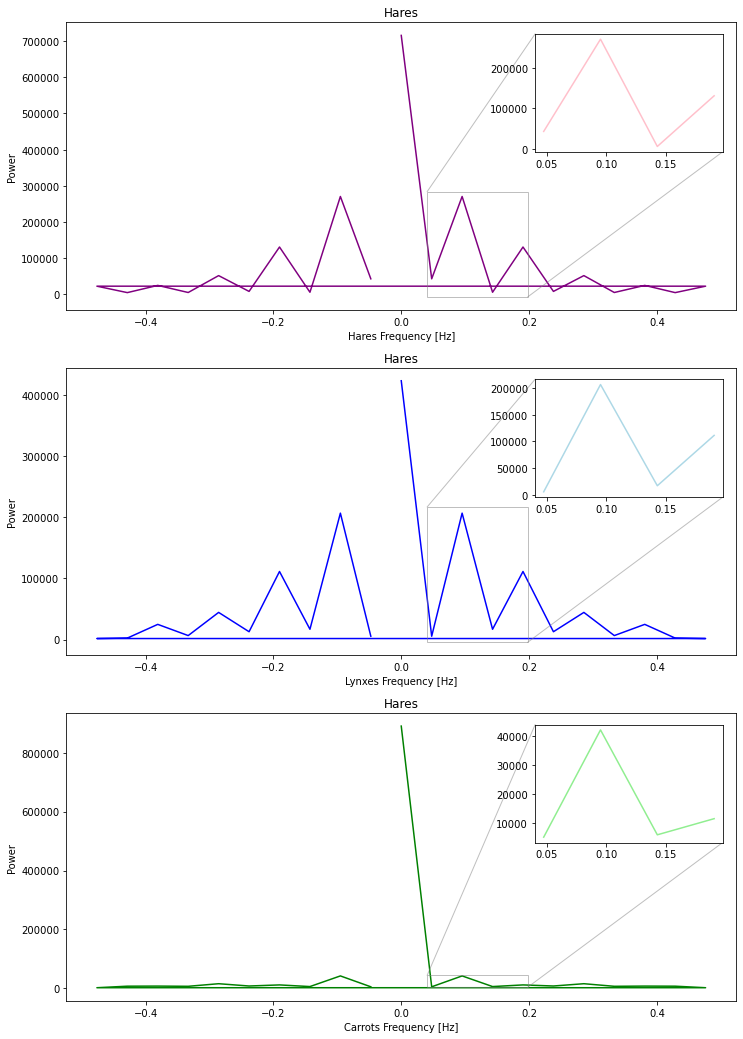

Frequency hares peak :  0.09523809523809523 years^(-1) 
Period hares : 10.5 years

Frequency lynxes peak :  0.09523809523809523 years^(-1)  
Period lynxes : 10.5 years

Frequency carrots peak :  0.09523809523809523 years^(-1) 
Period carrots: 10.5 years



In [17]:
# Plot 
fig, ax = plt.subplots(nrows=3, ncols=1, sharex='row', figsize=(12,18))

#hare plot
ax[0].set_xlabel('Hares Frequency [Hz]')
ax[0].set_ylabel('Power')
ax[0].set_title('Hares')

ax[0].plot(HareFreq, HarePow, color = 'purple')

axes0 = ax[0].inset_axes([0.7, 0.55, 0.28, 0.41])
axes0.plot(HareF[:4], HPowes[:4], color = 'pink')
ax[0].indicate_inset_zoom(axes0)


#lynx plot
ax[1].set_xlabel('Lynxes Frequency [Hz]')
ax[1].set_ylabel('Power')
ax[1].set_title('Hares')

ax[1].plot(LynxFreq, LynxPow, color = 'b')

axes1 = ax[1].inset_axes([0.7, 0.55, 0.28, 0.41])
axes1.plot(LynxF[:4], LPowes[:4], color = 'lightblue')
ax[1].indicate_inset_zoom(axes1)

#carrot plot
ax[2].set_xlabel('Carrots Frequency [Hz]')
ax[2].set_ylabel('Power')
ax[2].set_title('Hares')

ax[2].plot(CarrotFreq, CarrotPow, color = 'g')

axes2 = ax[2].inset_axes([0.7, 0.55, 0.28, 0.41])
axes2.plot(CarrotF[:4], CPowes[:4], color = 'lightgreen')
ax[2].indicate_inset_zoom(axes2)



plt.show()

print('Frequency hares peak : ', HareMax, 'years^(-1) \nPeriod hares :', 1/HareMax, 'years\n')
print('Frequency lynxes peak : ', LynxMax, 'years^(-1)  \nPeriod lynxes :', 1/LynxMax, 'years\n')
print('Frequency carrots peak : ', CarrotMax, 'years^(-1) \nPeriod carrots:', 1/CarrotMax, 'years\n')

In [18]:
H_high_freq_fft = FFTHare.copy()
L_high_freq_fft = FFTLynx.copy()
C_high_freq_fft = FFTCarrot.copy()

# filter (set to zero) all high frequency components that are larger than peak_freq
H_high_freq_fft[np.abs(HareFreq) > HareMax] = 0
L_high_freq_fft[np.abs(LynxFreq) > LynxMax] = 0
C_high_freq_fft[np.abs(CarrotFreq) > CarrotMax] = 0

# calculate the Inverse Fast Fourier Transform
H_filtered_sig = fftpack.ifft(H_high_freq_fft)
L_filtered_sig = fftpack.ifft(L_high_freq_fft)
C_filtered_sig = fftpack.ifft(C_high_freq_fft)

H_filtered_sig = fftpack.ifft(H_high_freq_fft)
L_filtered_sig = fftpack.ifft(L_high_freq_fft)
C_filtered_sig = fftpack.ifft(C_high_freq_fft)
# only take the real part
H_real_filtered_signal = np.real(H_filtered_sig)
L_real_filtered_signal = np.real(L_filtered_sig)
C_real_filtered_signal = np.real(C_filtered_sig)

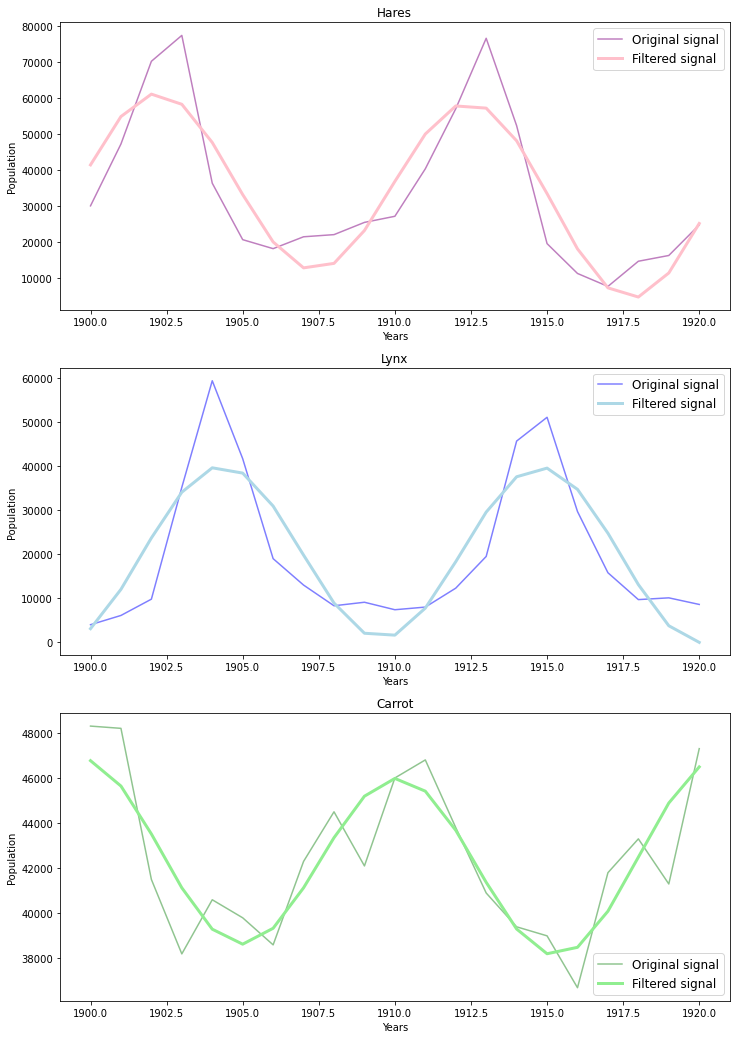

In [19]:
# plot the result of the IFFT
fig, ax = plt.subplots(nrows=3, ncols=1, sharex='row', figsize=(12,18))

#hares
ax[0].plot(years, harePopulation, alpha=0.5, label='Original signal', color = 'purple')
ax[0].plot(years, H_real_filtered_signal, linewidth=3, label='Filtered signal', color = 'pink')
ax[0].set_xlabel('Years')
ax[0].set_ylabel('Population')
ax[0].set_title('Hares')
ax[0].legend(loc='best', fontsize = 12)

#lynxes
ax[1].plot(years, lynxPopulation, alpha=0.5, label='Original signal', color = 'b')
ax[1].plot(years, L_real_filtered_signal, linewidth=3, label='Filtered signal', color = 'lightblue')
ax[1].set_xlabel('Years')
ax[1].set_ylabel('Population')
ax[1].set_title('Lynx')
ax[1].legend(loc='best', fontsize = 12)

#carrots
ax[2].plot(years, carrotPopulation, alpha=0.5, label='Original signal', color = 'forestgreen')
ax[2].plot(years, C_real_filtered_signal, linewidth=3, label='Filtered signal', color = 'lightgreen')
ax[2].set_xlabel('Years')
ax[2].set_ylabel('Population')
ax[2].set_title('Carrot')
ax[2].legend(loc='best', fontsize = 12)

[]

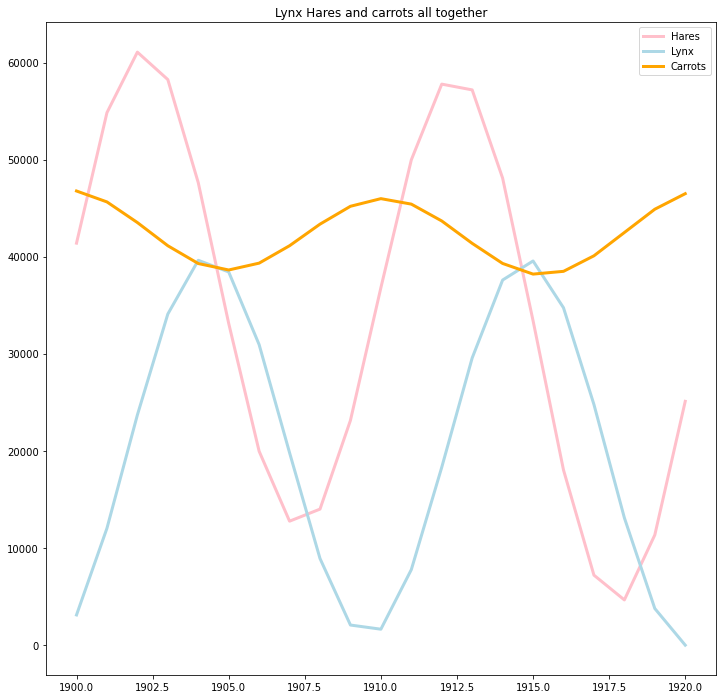

In [20]:
plt.figure(figsize=(12, 12))
plt.plot(years, H_real_filtered_signal, linewidth=3, label='Hares', color = 'pink')
plt.plot(years, L_real_filtered_signal, linewidth=3, label='Lynx', color = 'lightblue')
plt.plot(years, C_real_filtered_signal, linewidth=3, label='Carrots', color = 'orange')

plt.title('Lynx Hares and carrots all together')
plt.legend()
plt.plot()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

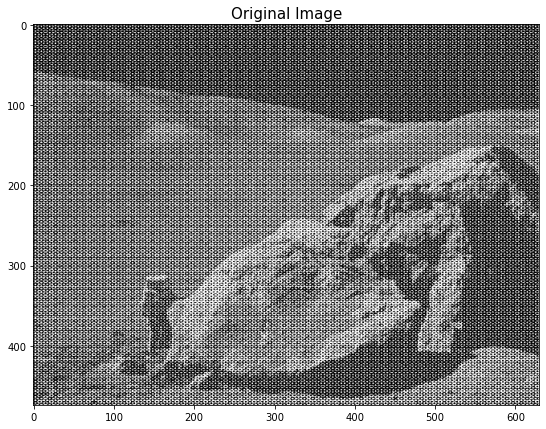

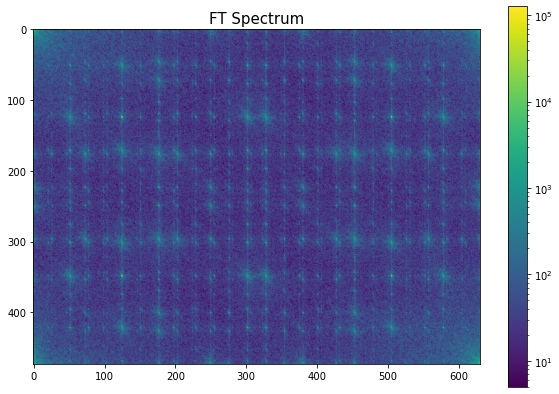

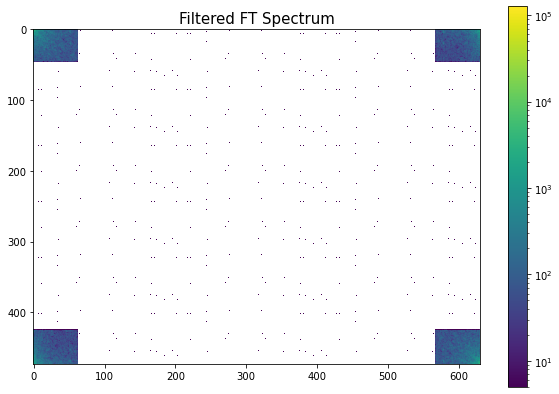

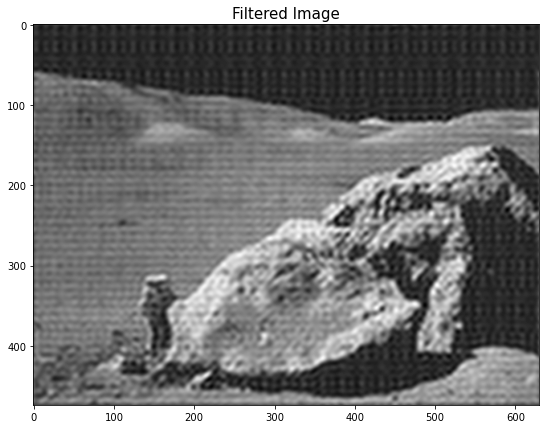

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2
from matplotlib.colors import LogNorm
image = plt.imread('moonlanding.png')
fig, ax = plt.subplots(figsize=(10, 7))
plt.imshow(image, cmap = "gray")
plt.title('Original Image', size = 15)
plt.show()
fft_image = fft2(image)
fig, ax = plt.subplots(figsize=(10, 7))
plt.imshow(np.abs(fft_image), norm = LogNorm(vmin = 5))
plt.title('FT Spectrum', size = 15)
plt.colorbar()
plt.show()
keep_fraction = 0.1
rows, columns = fft_image.shape
fft_image[int(rows * keep_fraction): int(rows * (1 - keep_fraction))] = 0
fft_image[:, int(columns * keep_fraction): int(columns * (1-keep_fraction))] = 0
fig, ax = plt.subplots(figsize=(10, 7))
plt.imshow(np.abs(fft_image), norm = LogNorm(vmin = 5))
plt.title('Filtered FT Spectrum', size = 15)
plt.colorbar()
plt.show()
image_filtered = ifft2(fft_image).real
fig, ax = plt.subplots(figsize=(10, 7))
plt.title('Filtered Image', size = 15)
plt.imshow(image_filtered, plt.cm.gray)
plt.show()